In [ ]:
#pip3 freeze > requirements.txt

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

2023-09-18 12:19:52.935159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 12:19:52.977091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 12:19:52.978366: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 12:19:53.881725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Lectura datos propios

In [2]:
data = pd.read_csv("../data/Numbers_Dataset/numbers.csv")
data = data.drop(columns=['Unnamed: 0'], axis=1)
data = data[data["label"]!="X"]
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.890196,0.615686,0.0,0.0,0.462745,1.0,4
1,1.0,1.0,1.0,1.0,0.980392,0.890196,0.890196,0.890196,0.890196,0.890196,...,1.000000,1.000000,0.717647,0.019608,0.000000,0.0,0.0,0.572549,1.0,7
2,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.462745,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,7
3,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.337255,0.917647,0.917647,1.0,1.0,1.000000,1.0,2
4,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.976471,0.862745,0.862745,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.521569,0.941176,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,6
789,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.925490,0.784314,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3
790,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,0
791,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.784314,0.262745,...,0.062745,0.698039,0.917647,1.000000,1.000000,1.0,1.0,1.000000,1.0,9


In [3]:
# Revisar los valores de la columna label
set(data.iloc[:,-1].values)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [4]:
#revisar si toca normalizar los datos o ya estan normalizados 
set(data.iloc[:,:-1].max()) # ya estan normalizados

{1.0}

In [5]:
# Separacion datos de labels
data_x = data.iloc[:,:-1]; data_y = data.iloc[:,-1].astype(int)

### Plotting function

In [6]:
import matplotlib.pyplot as plt

def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(int(train_labels[i]))
    plt.show()

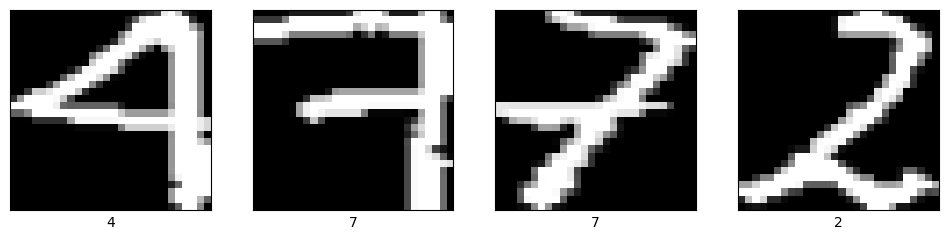

In [7]:
show_images(np.array(data_x).reshape((714,28,28)), list(set(data_y)), data_y, nb_samples=4)

In [8]:
# Corrigiendo los datos dado que los espacios en blanco deben ser 0
data_x = np.abs(data_x - 1)

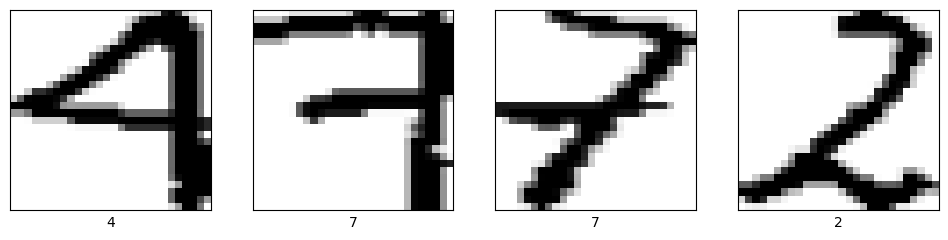

In [9]:
show_images(np.array(data_x).reshape((714,28,28)), list(set(data_y)), data_y, nb_samples=4)

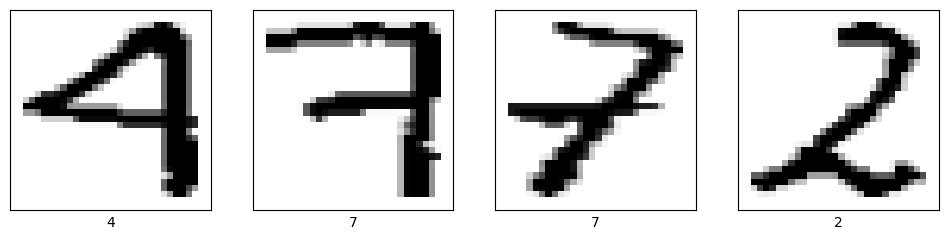

In [10]:
# Le vamos a añadir padding a los datos para que sean de 32x32 y asi poder usar la red LeNet
data_x = np.array(data_x).reshape((714,28,28))
data_x = np.pad(data_x, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(data_x, list(set(data_y)), data_y, nb_samples=4)

# Entrenamiento Red LeNet

## Datos

In [11]:
import idx2numpy
import numpy as np

In [12]:
# Especifica la ruta al archivo IDX-UBYTE que deseas cargar
archivo_idx = "/home/coberndorm/Documents/Semestre_IX/ArtificialIntelligence/Trabajo_2/LeNet/train-images.idx3-ubyte"

# Utiliza idx2numpy para cargar el archivo IDX en una matriz NumPy
train_x = idx2numpy.convert_from_file("../data/Numbers_Dataset/train-images.idx3-ubyte")
train_labels = idx2numpy.convert_from_file("../data/Numbers_Dataset/train-labels.idx1-ubyte")
test_x = idx2numpy.convert_from_file("../data/Numbers_Dataset/t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file("../data/Numbers_Dataset/t10k-labels.idx1-ubyte")
class_names = list(set(train_labels))
class_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
#revisar si toca normalizar los datos o ya estan normalizados 
np.max(train_x.reshape((60000, 784)),axis=0) # No estan normalizados

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116,
       254, 216,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  16,  47, 157, 254, 255, 254, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 244, 255, 184, 197,
         0,   0,   0,   0,   0,   0,  64,  29, 134,  62, 234, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 165,   0,   0,   0,   0, 141, 101,  96, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 192, 121,   0,   0,  38, 144, 101, 254,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 254, 221,  63,   0,   0,  95,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  93,   0,
         7, 210, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [14]:
# Sabemos que el valor maximo de un pixel es 255, por lo tanto, vamos a normalizar los datos
train_x = train_x / 255 # Normalizar los datos de entrenamiento
test_x = test_x / 255 # Normalizar los datos de prueba

In [15]:
# añadir padding a los datos para que sean de 32x32 y asi poder usar la red LeNet
train_x = np.pad(train_x, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
test_x = np.pad(test_x, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
train_x.shape, test_x.shape

((60000, 32, 32), (10000, 32, 32))

In [16]:
# Volviendo los valores de las etiquetas en categorias
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

## LeNet5

![Alt text](image.png)

1. The input layer consists of (32 x 32 x 1) dimension images. As the images are 28 x 28, they are padded with 0s to make them 32 x 32.
2. Convolution Layer 1 : Consists of 6 filters of size 5 x 5. Gives an output of shape (28 x 28 x 6).
3. Pooling Layer 1 : Max pooling which reduces the input size in half. Output: (14 x 14 x 6).
4. Convolution Layer 2 : Consists of 16 filters of size 5 x 5. Gives an output of shape (10 x 10 x 16).
5. Pooling Layer 2 : Max pooling which reduces the input size in half. Output: (5 x 5 x 16)..
6. The output is then flattened and passed on to a fully connected layer of 120 neurons and then 84 neurons.
7. The final output is a softmax output with 10 classes.


### Training

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32,32,1)
FILTER1_SIZE = 6
FILTER2_SIZE = 16
FILTER_SHAPE = (5, 5)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE,activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [18]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_x, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_x, test_labels))

Epoch 1/30


2023-09-16 17:07:58.595523: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245760000 exceeds 10% of free system memory.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.1682 - accuracy: 0.9501 - precision: 0.9685 - recall: 0.9324 - val_loss: 0.0570 - val_accuracy: 0.9820 - val_precision: 0.9852 - val_recall: 0.9799
Epoch 2/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0557 - accuracy: 0.9824 - precision: 0.9846 - recall: 0.9805 - val_loss: 0.0459 - val_accuracy: 0.9849 - val_precision: 0.9862 - val_recall: 0.9832
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0406 - accuracy: 0.9873 - precision: 0.9888 - recall: 0.9862 - val_loss: 0.0365 - val_accuracy: 0.9876 - val_precision: 0.9893 - val_recall: 0.9867
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0318 - accuracy: 0.9900 - precision: 0.9912 - recall: 0.9893 - val_loss: 0.0306 - val_accuracy: 0.9899 - val_precision: 0.9910 - val_recall: 0.9892
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0257 - accuracy: 0.9915 

In [17]:
def show_performance_curve(training_result, metric, metric_label):
    
	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]
    
	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')
            	 
	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

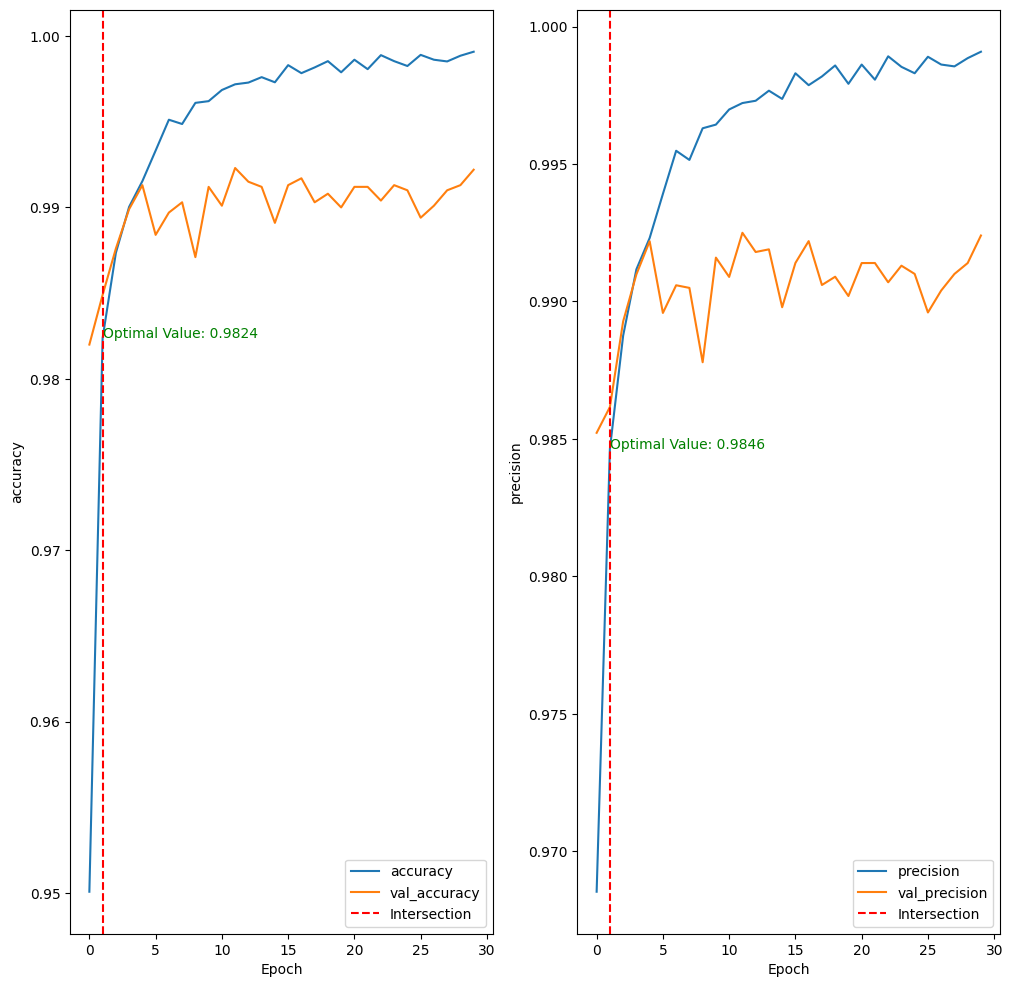

In [21]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
show_performance_curve(training_history, 'accuracy', 'accuracy')
plt.subplot(1, 2, 2)
show_performance_curve(training_history, 'precision', 'precision')

313/313 [==============================] - 1s 3ms/step


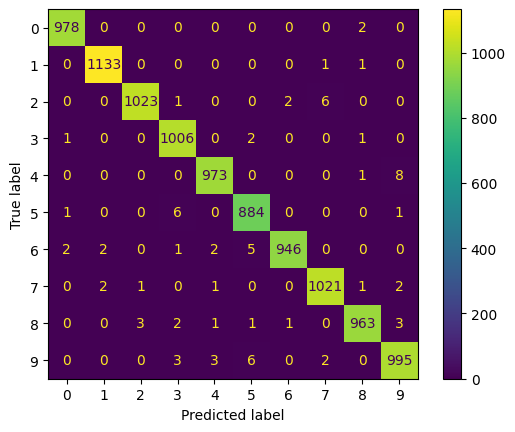

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_x)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

# Revisando el modelo con nuestros datos

23/23 [==============================] - 0s 4ms/step


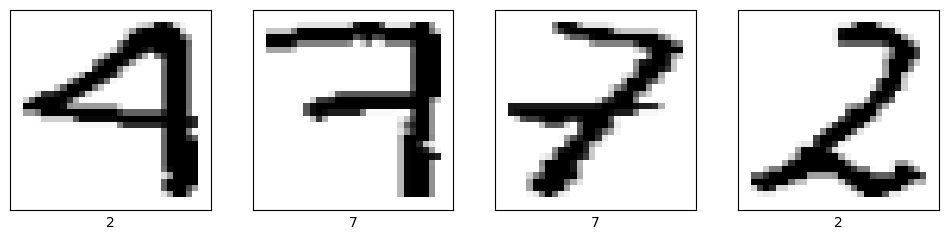

In [24]:
predictions = model.predict(data_x)
predicted_classes = predictions.argmax(axis=-1)
show_images(data_x,class_names,predicted_classes, nb_samples=4)

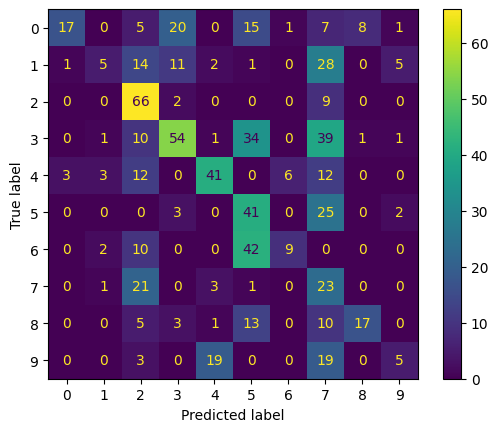

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix([int(i) for i in data.iloc[:,-1].values], predicted_classes)

cmd = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

# Probemos el inverso
Entrenemos un modelo con nuestros datos y Luego vemos como se comparta este modelo con los datos de MNIST

### Fixing data

In [41]:
counts = data.groupby('label').size()
print(counts)

label
0     74
1     67
2     77
3    141
4     77
5     71
6     63
7     49
8     49
9     46
dtype: int64


In [48]:
# Botando mitad de los datos de los numeros 3 para balancear el dataset
rows_to_drop = data[data['label'] == '3'].sample(frac=0.5).index

# Drop the identified rows
data_balanced = data.drop(rows_to_drop)

# Print the results
print(data_balanced.groupby('label').size())

label
0    74
1    67
2    77
3    71
4    77
5    71
6    63
7    49
8    49
9    46
dtype: int64


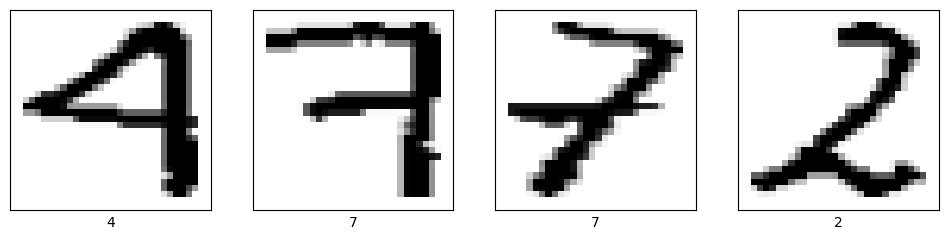

In [61]:
data_x = data.iloc[:,:-1]; data_y = data.iloc[:,-1].astype(int)
# Corrigiendo los datos dado que los espacios en blanco deben ser 0
data_x = np.abs(data_x - 1)
# añadir padding a los datos para que sean de 32x32 y asi poder usar la red LeNet
data_x = np.array(data_x).reshape((-1,28,28))
data_x = np.pad(data_x, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(data_x, list(set(data_y)), data_y, nb_samples=4)

In [62]:
train_data_x, test_data_x, train_data_labels, test_data_labels = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

# Volviendo los valores de las etiquetas en categorias
train_data_labels = to_categorical(train_data_labels, len(class_names))
test_data_labels = to_categorical(test_data_labels, len(class_names))


### Training

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32,32,1)
FILTER1_SIZE = 6
FILTER2_SIZE = 16
FILTER_SHAPE = (5, 5)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE,activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [71]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.utils import to_categorical


BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)


# Train the model
training_history = model.fit(train_data_x, train_data_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_data_x, test_data_labels))

Epoch 1/30
18/18 [==============================] - 1s 19ms/step - loss: 0.0223 - accuracy: 0.9930 - precision: 0.9930 - recall: 0.9877 - val_loss: 0.3496 - val_accuracy: 0.9161 - val_precision: 0.9161 - val_recall: 0.9161
Epoch 2/30
18/18 [==============================] - 0s 10ms/step - loss: 0.0360 - accuracy: 0.9842 - precision: 0.9860 - recall: 0.9842 - val_loss: 0.2336 - val_accuracy: 0.9441 - val_precision: 0.9574 - val_recall: 0.9441
Epoch 3/30
18/18 [==============================] - 0s 9ms/step - loss: 0.0170 - accuracy: 0.9965 - precision: 0.9965 - recall: 0.9965 - val_loss: 0.2443 - val_accuracy: 0.9510 - val_precision: 0.9507 - val_recall: 0.9441
Epoch 4/30
18/18 [==============================] - 0s 8ms/step - loss: 0.0093 - accuracy: 0.9982 - precision: 0.9982 - recall: 0.9982 - val_loss: 0.2911 - val_accuracy: 0.9441 - val_precision: 0.9441 - val_recall: 0.9441
Epoch 5/30
18/18 [==============================] - 0s 12ms/step - loss: 0.0084 - accuracy: 0.9982 - precision

5/5 [==============================] - 0s 4ms/step


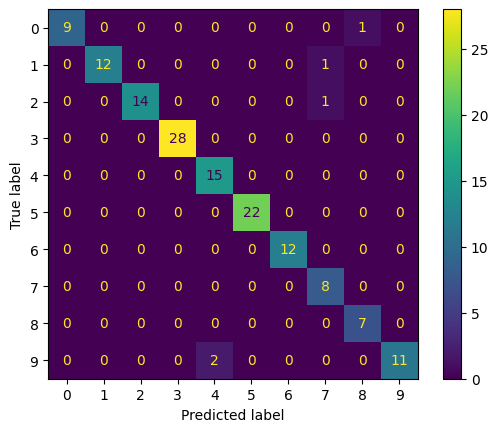

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_data_x)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_data_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

### Validacion con datos MNIST

313/313 [==============================] - 1s 3ms/step


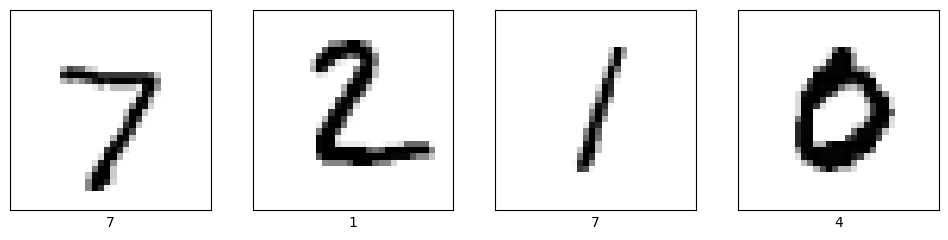

In [68]:
predictions = model.predict(test_x)
predicted_classes = predictions.argmax(axis=-1)
show_images(test_x,class_names,predicted_classes, nb_samples=4)

313/313 [==============================] - 1s 3ms/step


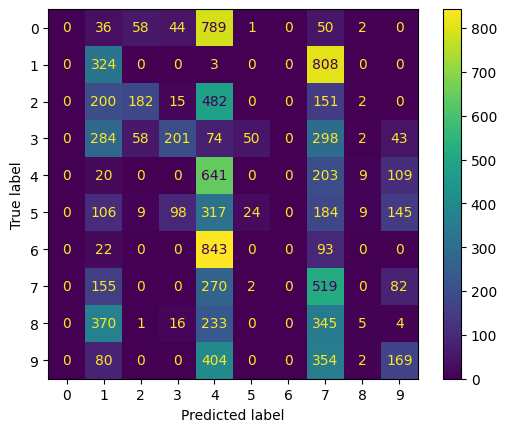

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_x)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()